<h1 align="center"> PCA + Logistic Regression (MNIST) </h1>
* https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
* https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_to_Speed-up_Machine_Learning_Algorithms.ipynb
* https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

In [23]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

## Download and Load the Data

In [24]:
df = pd.read_csv("bgg_db_1806.csv", encoding='latin-1')
df.head()

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
0,1,https://boardgamegeek.com/boardgame/174430/glo...,174430,Gloomhaven,1,4,120,60,120,2017,8.98893,8.61858,15376,https://cf.geekdo-images.com/original/img/lDN3...,12,"Action / Movement Programming, Co-operative Pl...",25928,"Adventure, Exploration, Fantasy, Fighting, Min...",Isaac Childres,3.7543
1,2,https://boardgamegeek.com/boardgame/161936/pan...,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,8.66140,8.50163,26063,https://cf.geekdo-images.com/original/img/P_Sw...,13,"Action Point Allowance System, Co-operative Pl...",41605,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8210
2,3,https://boardgamegeek.com/boardgame/182028/thr...,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,8.60673,8.30183,12352,https://cf.geekdo-images.com/original/img/1d2h...,14,"Action Point Allowance System, Auction/Bidding...",15848,"Card Game, Civilization, Economic",Vlaada ChvÃ¡til,4.3678
3,4,https://boardgamegeek.com/boardgame/167791/ter...,167791,Terraforming Mars,1,5,120,120,120,2016,8.38461,8.19914,26004,https://cf.geekdo-images.com/original/img/o8z_...,12,"Card Drafting, Hand Management, Set Collection...",33340,"Economic, Environmental, Industry / Manufactur...",Jacob Fryxelius,3.2456
4,5,https://boardgamegeek.com/boardgame/12333/twil...,12333,Twilight Struggle,2,2,180,120,180,2005,8.33954,8.19787,31301,https://cf.geekdo-images.com/original/img/ZPnn...,13,"Area Control / Area Influence, Campaign / Batt...",42952,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5518


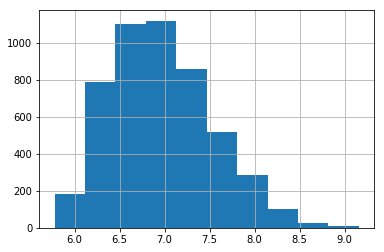

In [25]:
df['avg_rating'].hist()

In [26]:
df["avg_rating_buckets"] = pd.cut(df.avg_rating, [0,4,6,8,10], labels=["abysmal", "low", "average", "high"], include_lowest=True)

In [27]:
df.head()

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,...,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight,avg_rating_buckets
0,1,https://boardgamegeek.com/boardgame/174430/glo...,174430,Gloomhaven,1,4,120,60,120,2017,...,8.61858,15376,https://cf.geekdo-images.com/original/img/lDN3...,12,"Action / Movement Programming, Co-operative Pl...",25928,"Adventure, Exploration, Fantasy, Fighting, Min...",Isaac Childres,3.7543,high
1,2,https://boardgamegeek.com/boardgame/161936/pan...,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,...,8.50163,26063,https://cf.geekdo-images.com/original/img/P_Sw...,13,"Action Point Allowance System, Co-operative Pl...",41605,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8210,high
2,3,https://boardgamegeek.com/boardgame/182028/thr...,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,...,8.30183,12352,https://cf.geekdo-images.com/original/img/1d2h...,14,"Action Point Allowance System, Auction/Bidding...",15848,"Card Game, Civilization, Economic",Vlaada ChvÃ¡til,4.3678,high
3,4,https://boardgamegeek.com/boardgame/167791/ter...,167791,Terraforming Mars,1,5,120,120,120,2016,...,8.19914,26004,https://cf.geekdo-images.com/original/img/o8z_...,12,"Card Drafting, Hand Management, Set Collection...",33340,"Economic, Environmental, Industry / Manufactur...",Jacob Fryxelius,3.2456,high
4,5,https://boardgamegeek.com/boardgame/12333/twil...,12333,Twilight Struggle,2,2,180,120,180,2005,...,8.19787,31301,https://cf.geekdo-images.com/original/img/ZPnn...,13,"Area Control / Area Influence, Campaign / Batt...",42952,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5518,high


## Splitting Data into Training and Test Sets

In [28]:
def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        #le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed
        

In [29]:
df.columns

Index(['rank', 'bgg_url', 'game_id', 'names', 'min_players', 'max_players',
       'avg_time', 'min_time', 'max_time', 'year', 'avg_rating', 'geek_rating',
       'num_votes', 'image_url', 'age', 'mechanic', 'owned', 'category',
       'designer', 'weight', 'avg_rating_buckets'],
      dtype='object')

In [30]:
# Encode Labels
features = df[['rank', 'min_players', 'max_players', 'avg_time', 'min_time', 'max_time', 
               'year', 'num_votes', 'image_url', 'age', 
               'mechanic', 'owned', 'category','designer', 'weight']]

label_encode(features, features.columns.values)

target = df[['avg_rating_buckets']]
label_encode(target, target.columns.values)



/Users/dmitriyb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [31]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.33, random_state = 10)


## PCA to Speed up Machine Learning Algorithms (Logistic Regression)

<b>Step 0:</b> Import and use PCA. After PCA you will apply a machine learning algorithm of your choice to the transformed data

In [32]:
from sklearn.decomposition import PCA

Make an instance of the Model

In [33]:
pca = PCA(n_components=3)

Fit PCA on training set. <b>Note: you are fitting PCA on the training set only</b>

In [34]:
pca.fit(features_train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: [0.39911139 0.28091578 0.1129833 ]


In [36]:
# Convert principal components into a dataframe
principalComponents = pca.fit_transform(features_train)
pca_df = pd.DataFrame(data=principalComponents, columns=['component1','component2','component3'])
pca_df.head()

,component1,component2,component3
0,-2069.713610,1185.267590,939.686472
1,-585.542596,36.611372,217.804106
2,1450.130353,-595.084707,-198.299377
3,-522.292095,-1317.784919,948.823830
4,-517.915279,-138.789604,-513.437076


In [39]:
print("Original dataframe shape: ")
print(features_train.shape)
print("PCA dataframe shape: ")
print(pca_df.shape)

Original dataframe shape: 
(3349, 15)
PCA dataframe shape: 
(3349, 3)


Apply the mapping (transform) to <b>both</b> the training set and the test set. 

In [38]:
train_img = pca.transform(features_train)
test_img = pca.transform(features_test)

<b>Step 1: </b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [40]:
from sklearn.linear_model import LogisticRegression

<b>Step 2:</b> Make an instance of the Model

In [41]:

logisticRegr = LogisticRegression()

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (digits) and y (labels)

In [42]:
logisticRegr.fit(features_train, target_train)

/Users/dmitriyb/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<b>Step 4:</b> Predict the labels of new data (new images)

Uses the information the model learned during the model training process

In [43]:
# Returns a NumPy Array
logisticRegr.predict(features_test)

array([0, 0, 0, ..., 0, 0, 0])

## Measuring Model Performance

accuracy (fraction of correct predictions): correct predictions / total number of data points

Basically, how the model performs on new data (test set)

In [44]:
score = logisticRegr.score(features_test, target_test)
print(score)

0.9357575757575758
